# Softmax exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

This exercise is analogous to the SVM exercise. You will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient
- use a validation set to **tune the learning rate and regularization** strength
- **optimize** the loss function with **SGD**
- **visualize** the final learned weights


In [1]:
# Run some setup code
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# bool var. to let program show debug info.
debug = True
show_img = True

## CIFAR-10 Data Loading and Preprocessing

Cifar-10 dataset has been loaded
X shape (50000, 32, 32, 3)
y shape (50000,)
X_test shape (10000, 32, 32, 3)
y_test shape (10000,)
Data has been splited.
X shape (49000, 32, 32, 3)
y shape (49000,)
X_val shape (1000, 32, 32, 3)
y_val shape (1000,)
X_test shape (1000, 32, 32, 3)
y_test shape (1000,)
X_dev shape (500, 32, 32, 3)
y_dev shape (500,)
Data has been reshaped.
X shape (49000, 3072)
X_val shape (1000, 3072)
X_test shape (1000, 3072)
X_dev shape (500, 3072)


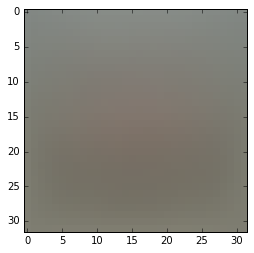

In [2]:
import cifar10
# Load the raw CIFAR-10 data
X, y, X_test, y_test = cifar10.load('../cifar-10-batches-py', debug = debug)

m = 49000
m_val = 1000
m_test = 1000
m_dev = 500

X, y, X_test, y_test, X_dev, y_dev, X_val, y_val = cifar10.split_vec(X, y, X_test, y_test, m, m_test, m_val, m_dev, debug = debug, show_img = show_img)

## Softmax Classifier

In [33]:
n = X_dev.shape[1]
K = 10
from softmax import Softmax
model = Softmax(n, K)

lamda = 0.0
model.train_check(X, y, lamda)

lamda = 3.3
model.train_check(X, y, lamda)

J = 2.44552841355 sanity check = 2.30258509299

Gradient check on W
rel. err. 8.48893259894e-07 numerical: 0.052149428198 analytical: 0.0521493396595
rel. err. 7.3654146746e-09 numerical: 1.0542421859 analytical: 1.05424217038
rel. err. 5.34291306077e-09 numerical: 0.939688157353 analytical: 0.939688167394
rel. err. 3.04297722387e-08 numerical: -0.447169255446 analytical: -0.447169228232
rel. err. 3.31235275558e-08 numerical: 1.05644671935 analytical: 1.05644664936
rel. err. 1.32898676054e-07 numerical: 0.486943486777 analytical: 0.486943357349
rel. err. 8.50197127198e-09 numerical: -1.6191788498 analytical: -1.61917882227
rel. err. 2.18248988289e-08 numerical: -2.58523662833 analytical: -2.58523674117
rel. err. 1.51188140827e-08 numerical: 1.60225299544 analytical: 1.60225294699
rel. err. 5.9446521064e-09 numerical: -4.5943868701 analytical: -4.59438692473

Gradient check on b
rel. err. 4.26723361959e-08 numerical: -0.00064467355898 analytical: -0.000644673503961
rel. err. 1.550407248

Inline Question 1:
Why do we expect our loss to be close to -log(0.1)? Explain briefly.**
Your answer: log(K)

In [40]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
results = {}
best_val = -1
best_model = None
best_hpara = None

T = 1500
B = 256
alpha = 1e-6
# alphalearning_rates = [1e-7, 5e-7]
# regularization_strengths = [5e4, 1e8]
for lamda in [1e0, 1e3, 1e1]:
    model = Softmax(n, K)
    hpara = (alpha, lamda, T, B)
    model.train(X, y, hpara, show_img = False, debug = False)
    
    y_hat = model.predict(X)
    train_acc = np.mean(y == y_hat)
    y_val_hat = model.predict(X_val)
    val_acc = np.mean(y_val == y_val_hat)
    results[(alpha, lamda)] = (train_acc, val_acc)
    print 'alpha =', alpha, 'lamda =', lamda, 'train_acc =', train_acc, 'val_acc =', val_acc
    
    if val_acc > best_val:
        best_model = model
        best_val = val_acc
        best_hpara = hpara

alpha = 1e-06 lamda = 1.0 train_acc = 0.424 val_acc = 0.416
alpha = 1e-06 lamda = 1000.0 train_acc = 0.413469387755 val_acc = 0.414
alpha = 1e-06 lamda = 10.0 train_acc = 0.423979591837 val_acc = 0.416


In [41]:
print 'best val. acc.:', best_val, 'best hpara:', best_hpara

best val. acc.: 0.416 best hpara: (1e-06, 1.0, 1500, 256)


In [42]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_hat = best_model.predict(X_test)
print 'test acc.:', np.mean(y_test_hat == y_test)

test acc.: 0.395


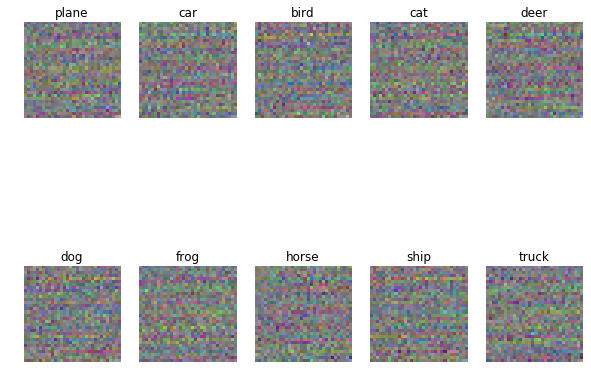

In [43]:
# Visualize the learned weights for each class
best_model.visualize_W()